In [40]:
var('t')
parametric_plot3d((cos(t),sin(t),t/10),(t,0,100),plot_points=200,thickness=2)

Graphics3d Object

In [41]:
parametric_plot3d((3*t-t**3,3*t**2,3*t+t**3),(t,-10,10),plot_points=200,thickness=2)

Graphics3d Object

In [42]:
parametric_plot3d((t,t**2,2/3*t**3),(t,-10,10),plot_points=200,thickness=2)

Graphics3d Object

In [143]:
def curbura(c):
    var('t')
    g(t)=c(t)
    v1=derivative(g,t)
    v2=derivative(v1,t)
    r=v1.cross_product(v2)
    rez=norm(r)/norm(v1)**3/2
    return rez.simplify_full()
def curbura2(c):
    var('t')
    g(t)=c(t)
    v1=derivative(g,t)
    v2=derivative(v1,t)
    r=v1[0]*v2[1]-v1[1]*v2[0]
    rez=r/norm(v1)**3
    return rez.simplify_full()

In [117]:
def torsiunea(c):
    var('t')
    g(t)=c(t)
    v1=derivative(g,t)
    v2=derivative(v1,t)
    v3=derivative(v2,t)
    r1=v1.cross_product(v2)
    r=r1.dot_product(v3)
    rez=r/norm(r1)**2
    return rez.simplify_full()

In [118]:
def c(x):
    return (cos(x),sin(x),x)

In [119]:
curbura(c)

1/4

In [51]:
torsiunea(c)

1/2

In [55]:
def c1(x):
    return (x,x**2,2/3*x**3)
show(curbura(c1))
show(torsiunea(c1))

1/(4*t^4 + 4*t^2 + 1)

2/(4*t^4 + 4*t^2 + 1)

In [56]:
parametric_plot3d((4/5*cos(t),1-sin(t),-3/5*cos(t)),(t,0,2*pi),thickness=2)

Graphics3d Object

In [145]:
def evoluta(c):
    var('t')
    g(t)=c(t)
    v1=derivative(g,t)
    v2=derivative(v1,t)
    n(t)=norm(v1(t))**2
    c0(t)=n(t)/(v1(t)[0]*v2(t)[1]-v2(t)[0]*v1(t)[1])
    r1=c(t)[0]-v1(t)[1]*c0(t)
    r2=c(t)[1]+v1(t)[0]*c0(t)
    return (r1.simplify_full().function(t),r2.simplify_full().function(t))

def osculator(c,u):
    var('t')
    c0=circle((evoluta(c)[0](u),evoluta(c)[1](u)),1/abs(curbura2(c)(u)))
    return c0

In [103]:
def elipsa(t):
    return (9*cos(t),4*sin(t))
show(evoluta(elipsa))

(t |--> 65/9*cos(t)^3, t |--> -65/4*sin(t)^3)

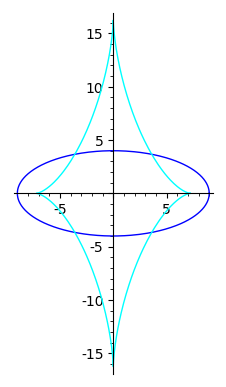

In [102]:
p1=parametric_plot(elipsa(t),(t,0,2*pi))
p2=parametric_plot(evoluta(elipsa),(0,2*pi),color=hue(0.5))
(p1+p2).show()

In [168]:
def evoluta_anim(c,tmin,tmax,s0,x0,x1,y0,y1):
    var('t')
    g(t)=c(t)
    a1=[parametric_plot(g,(tmin,tmax),color=hue(0.3)) for k in srange(tmin,tmax,s0)]
    a4=[point([c(u)[0],c(u)[1]],size=18,color='red') for u in srange(tmin,tmax,s0)]
    a5=[point([evoluta(c)[0](u),evoluta(c)[1](u)],size=18,color='black') for u in srange(tmin,tmax,s0)]
    a2=[parametric_plot(evoluta(c),(tmin,tmax),color=hue(0.5)) for k in srange(tmin,tmax,s0)]
    a3=[osculator(c,u) for u in srange(tmin,tmax,s0)]
    an1=animate(a1,xmin=x0,xmax=x1,ymin=y0,ymax=y1,figsize=[7,7])
    an2=animate(a2,xmin=x0,xmax=x1,ymin=y0,ymax=y1,figsize=[7,7])
    an3=animate(a3,xmin=x0,xmax=x1,ymin=y0,ymax=y1,figsize=[7,7])
    an4=animate(a4,xmin=x0,xmax=x1,ymin=y0,ymax=y1,figsize=[7,7])
    an5=animate(a5,xmin=x0,xmax=x1,ymin=y0,ymax=y1,figsize=[7,7])
    (an1+an2+an3+an4+an5).show()

/home/andrei/repozitorii/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:8: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


Animation with 63 frames
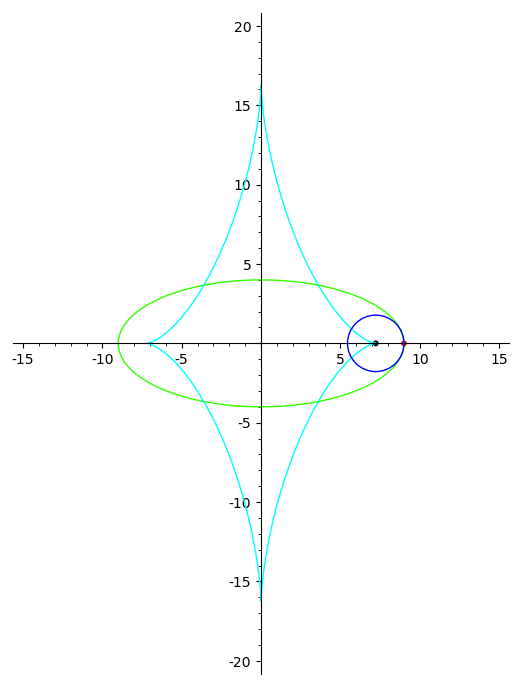

In [169]:
evoluta_anim(elipsa,0,2*pi,0.1,-15,15,-20,20)

65/9*cos(10)^3

<type 'sage.symbolic.expression.Expression'>